<a href="https://colab.research.google.com/github/Shavkatshoniyozov/Data_Science/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import tree

from sklearn.pipeline import Pipeline
from sklearn import metrics

# **Train dataset**

In [ ]:
df = pd.read_csv('/content/train.csv', index_col = 'PassengerId')

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df['Age'].fillna(method='bfill', inplace=True)

In [ ]:
df['Embarked'].fillna(method='ffill', inplace=True)

In [ ]:
df.corrwith(df['Survived']).abs().sort_values(ascending=False)

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Age         0.055505
SibSp       0.035322
dtype: float64

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.870561,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.597668,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


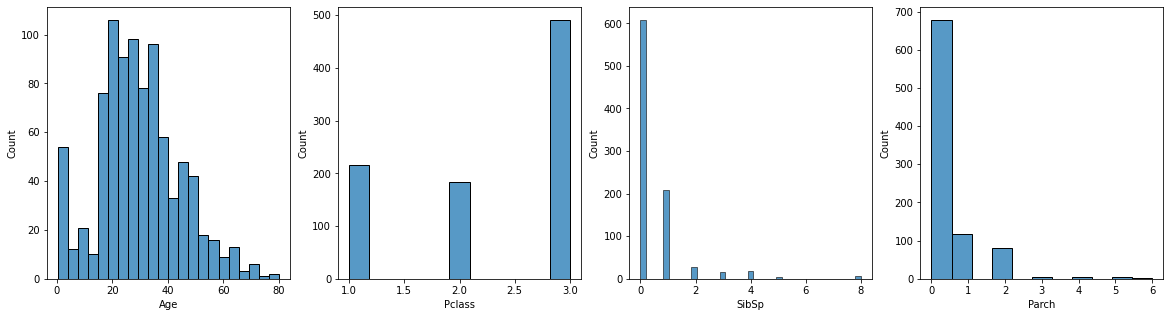

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

sns.histplot(data=df, x='Age', ax=axes[0])

sns.histplot(data=df, x='Pclass', ax=axes[1])


sns.histplot(data=df, x='SibSp', ax=axes[2])


sns.histplot(data=df, x='Parch', ax=axes[3])

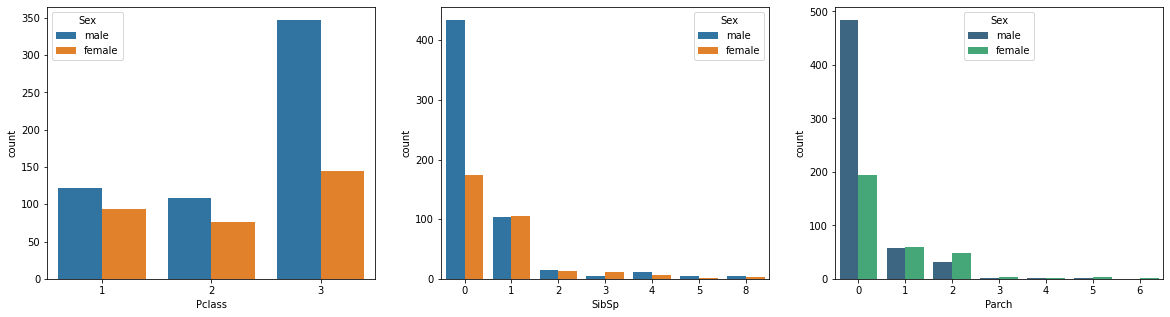

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (20,5))

sns.countplot(ax=axes[0], data=df, x='Pclass', hue='Sex')

sns.countplot(ax=axes[1], data=df, x='SibSp', hue='Sex')

sns.countplot(ax=axes[2], data=df, x='Parch', hue='Sex', palette='viridis')

# **Test dataset**

In [ ]:
data = pd.read_csv('/content/test.csv', index_col='PassengerId')
data1 = pd.read_csv('/content/test.csv')

In [ ]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [ ]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data.drop('Name', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
data['Age'].fillna(method='ffill', inplace=True)
data['Fare'].fillna(np.mean(df.Fare), inplace=True)

# **ML**

# Logistic Regression

In [ ]:
df.to_csv('train_filtered.csv')

In [ ]:
encoded_train = pd.get_dummies(df)
encoded_test = pd.get_dummies(data)

In [ ]:
x_train = encoded_train.drop('Survived', axis=1)
x_test = encoded_test
y_train = encoded_train['Survived']

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
#Logistic Regression
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
round(LR_model.score(x_train, y_train) * 100, 2)

79.8

In [ ]:
#Random Forest
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RF_model.score(x_train, y_train) * 100

98.54096520763187

In [ ]:
#Decicion Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

tree_model.score(x_train, y_train) * 100

98.54096520763187

In [ ]:
#Support Vector Machines
svm_model = SVC()
svm_model.fit(x_train, y_train)

round(svm_model.score(x_train, y_train) * 100, 2)

84.51

In [ ]:
#XGB Model
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

round(xgb_model.score(x_train, y_train) * 100, 2)

87.65

In [ ]:
#Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

round(model.score(x_train, y_train) * 100, 2)

39.36

In [ ]:
#best k value
param_grid = {'n_estimators' : np.arange(1,25)}
knn = GridSearchCV(RF_model, param_grid, cv=5)
knn.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=8),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn.best_estimator_

RandomForestClassifier(n_estimators=23)

In [ ]:
y_pre = RF_model.predict(x_test)

In [ ]:
submit = pd.DataFrame({
    'PassengerId': data1['PassengerId'],
    'Survived' : y_pre
})

In [ ]:
submit.to_csv('submit.csv', index=False)

In [ ]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
